In [13]:
#Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
#dataset have?

import pandas as pd
%matplotlib inline

df=pd.read_excel('flight_price.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [71]:
df.shape

(10683, 11)

The dataset has 10,683 rows and 11 columns

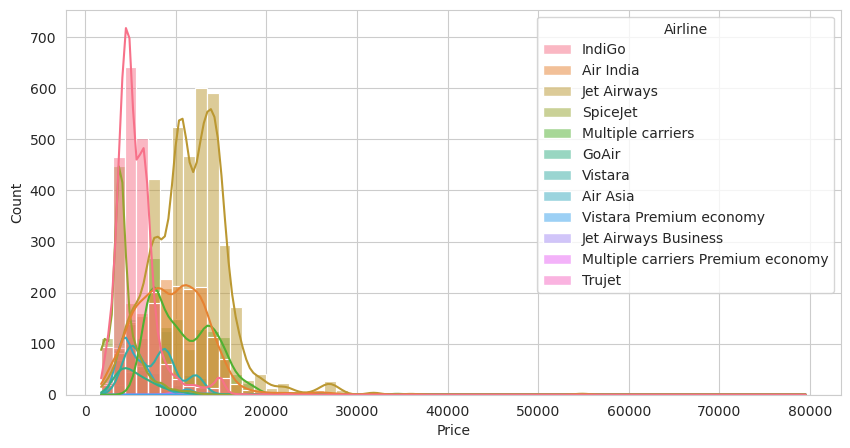

In [72]:
#Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
#distribution.
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#charting a histogram on prices across different airlines
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='Price', kde=True, hue='Airline', bins=60, ax=ax)
plt.show()


The data above shows that most airline prices are in range between 300-18000 
At a high level Jetairways tickets seem more expensive than Indigo airlines

In [73]:
#Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

Max_Price=np.max(df['Price'])
Min_Price=np.min(df['Price'])

print(f'The price ranges from {Min_Price} to {Max_Price} across all airlines')

The price ranges from 1759 to 79512 across all airlines


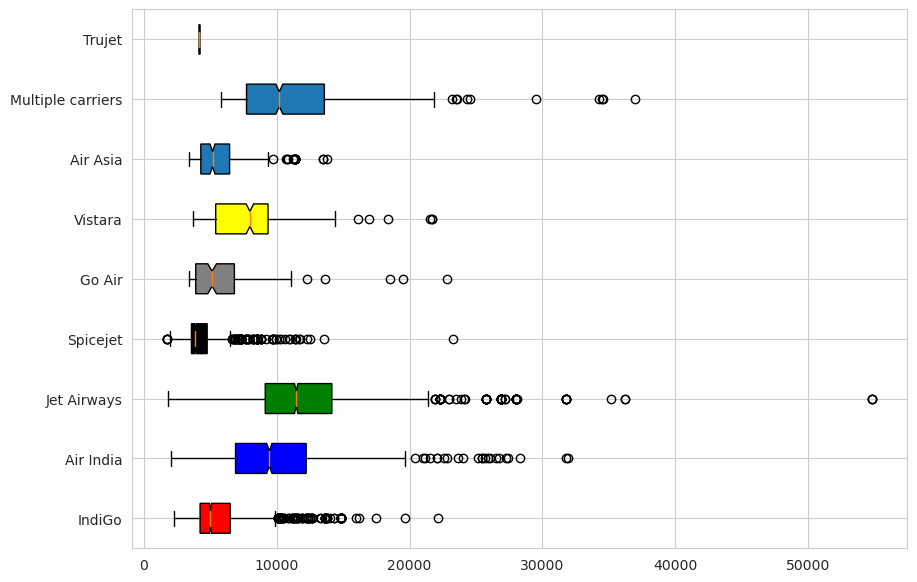

In [74]:
#Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
#airlines.


fig = plt.figure(figsize=(10, 7))

#TComparing prices for different airlines on boxplots
bp=plt.boxplot([df['Price'][df['Airline'] == 'IndiGo'], 
             df['Price'][df['Airline'] == 'Air India'], 
             df['Price'][df['Airline'] == 'Jet Airways'], 
             df['Price'][df['Airline'] == 'SpiceJet'], 
             df['Price'][df['Airline'] == 'GoAir'], 
             df['Price'][df['Airline'] == 'Vistara'],
             df['Price'][df['Airline'] == 'Air Asia'],df['Price'][df['Airline'] == 'Multiple carriers'],
             df['Price'][df['Airline'] == 'Trujet']],
            labels=['IndiGo', 'Air India', 'Jet Airways', 'Spicejet','Go Air', 'Vistara', 'Air Asia', 'Multiple carriers','Trujet'], patch_artist = True, notch =True, vert=False) 
# Set colors
colors = ['red', 'blue','green','black','grey','yellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()


In [75]:
#Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
#they may impact your analysis.

Yes there are mutiple outlier in the dataset across different airlines, to identify outliers in a dataset using boxplot, we can look for any data points that fall outside of the whiskers of the boxplot. 

There are several ways to remove outliers from a dataset. One way is to use Z-score method which involves creating a standard normal distribution of the variables and then checking if the points fall under the standard deviation of ±3.

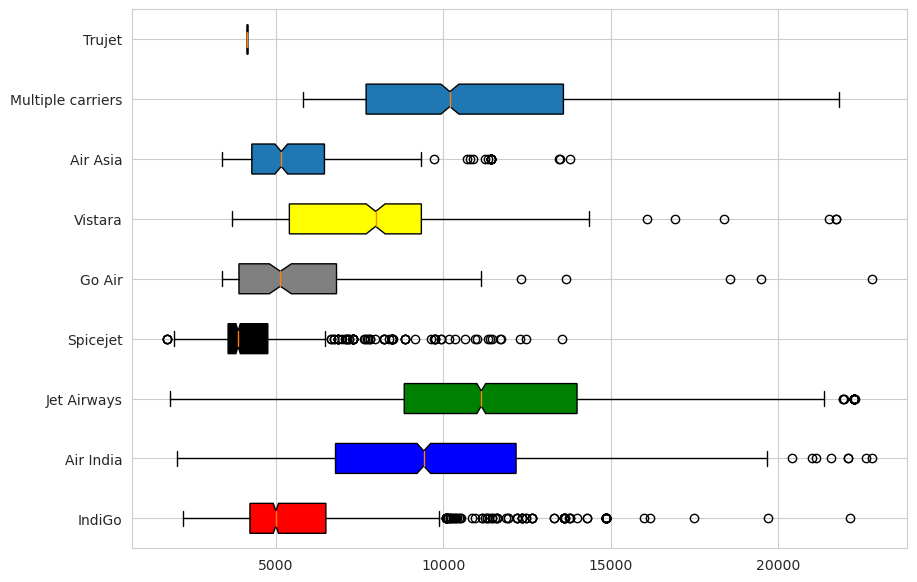

In [76]:
# Calculate Z-score
from scipy import stats
z = np.abs(stats.zscore(df['Price']))

# Remove outliers
df = df[(z < 3)]
fig = plt.figure(figsize=(10, 7))

#TComparing prices for different airlines on boxplots
bp=plt.boxplot([df['Price'][df['Airline'] == 'IndiGo'], 
             df['Price'][df['Airline'] == 'Air India'], 
             df['Price'][df['Airline'] == 'Jet Airways'], 
             df['Price'][df['Airline'] == 'SpiceJet'], 
             df['Price'][df['Airline'] == 'GoAir'], 
             df['Price'][df['Airline'] == 'Vistara'],
             df['Price'][df['Airline'] == 'Air Asia'],df['Price'][df['Airline'] == 'Multiple carriers'],
             df['Price'][df['Airline'] == 'Trujet']],
            labels=['IndiGo', 'Air India', 'Jet Airways', 'Spicejet','Go Air', 'Vistara', 'Air Asia', 'Multiple carriers','Trujet'], patch_artist = True, notch =True, vert=0) 
# Set colors
colors = ['red', 'blue','green','black','grey','yellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()


We have been able to substaintially remove a lot of outliers for airlines such as Jet Airways

In [ ]:
#Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
#to identify the peak travel season. What features would you analyze to identify the peak season, and how
#would you present your findings to your boss?

In [77]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


We can possibly identify the peak season by extracting the month of Travels for the passengers

In [80]:
from warnings import filterwarnings
filterwarnings('ignore')
#extracting day, month and year from the date of the journey column
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,2019


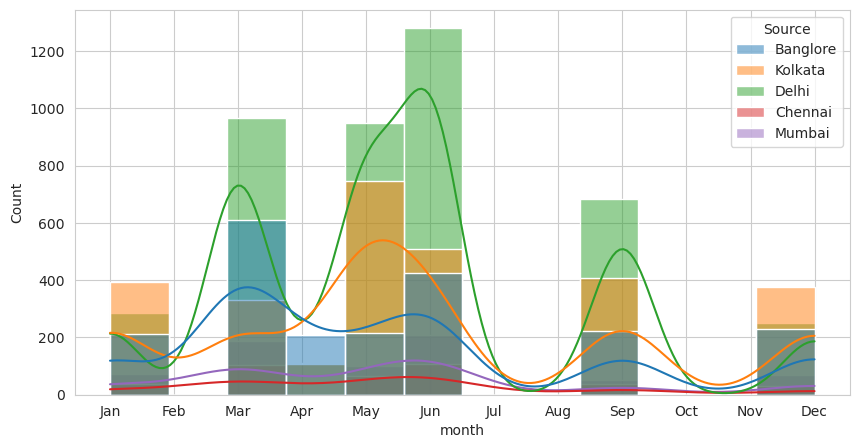

In [90]:
#now we can plot the month data on an histogram

#charting a histogram on prices across different Source cities
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='month', kde=True, hue='Source', bins=12, ax=ax)
plt.xticks([1, 2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.show()

From the above graph we can clearly see that the peak seasons are March, May, June, September and December, with highest volumes in June and source city being Delhi. 

Hence the call to action would be to plan for these peak seasons with extra staff at the travel agency for these periods to manage the staff workload better especially covering customers in Delhi and Kolkata, while reducing staff covering Chennai

To offer more discounts in non-peak seasons including Feb, Jul, Aug, Oct and Nov to improve customer traction and travel in these months

In [14]:
#Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
#Price dataset to identify any trends in flight prices. What features would you analyze to identify these
#trends, and what visualizations would you use to present your findings to your team?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
df=pd.read_excel('flight_price.xlsx')
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
from warnings import filterwarnings
filterwarnings('ignore')
#extracting day, month and year from the date of the journey column
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [16]:
df[['Flight_Hour','Flight_Min']] = df['Duration'].str.split(' ',1,expand=True)
df['Flight_Hour']=df['Flight_Hour'].str[:-1]
df['Flight_Min']=df['Flight_Min'].str[:-1]
df['Flight_Min'].fillna(method='ffill', inplace=True)
df['Flight_Hour'].fillna(method='ffill', inplace=True)
df["Flight_Hour"] = df["Flight_Hour"].astype(int)
df['Flight_Min']= df["Flight_Min"].astype(int)


df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Flight_Hour,Flight_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,19,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019,4,45


In [17]:
#Stripping spaces across all values in dataframe
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df.columns = df.columns.str.strip()
df
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
day                   9
month                 7
year                  1
Flight_Hour          43
Flight_Min           11
dtype: int64

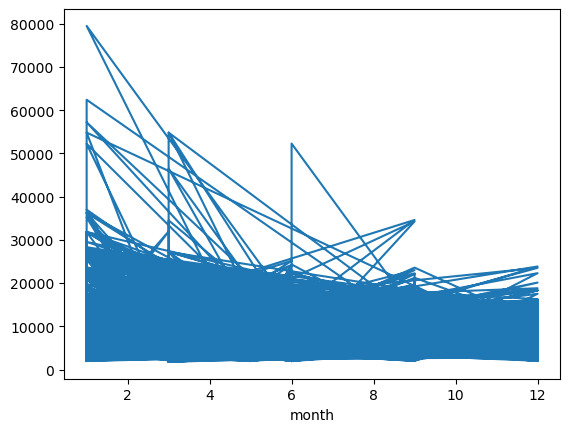

In [20]:
#Charting subplots to show trends of prices across time, duration of flights and days
df.set_index('month', inplace=True)
df['Price'].plot()
plt.show()


Seasonality- The month on month price variation seems to tell us that prices of tickets is higher in Jan and Feb while lower towards Nov and December



In [ ]:
#Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
#Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
#identify these factors, and how would you present your findings to the management team?

In [120]:
#Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
#Price dataset to identify any trends in flight prices. What features would you analyze to identify these
#trends, and what visualizations would you use to present your findings to your team?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
df=pd.read_excel('flight_price.xlsx')
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Cleaning the data including extracting day, month and hear from date of journey and dropping date of journey column, also spliiting duration column into hours and mins and then droping Duration column

In [121]:
from warnings import filterwarnings
filterwarnings('ignore')
#extracting day, month and year from the date of the journey column
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
#extracting Flight hours from duration

df[['Flight_Hour','Flight_Min']] = df['Duration'].str.split(' ',1,expand=True)
df['Flight_Hour']=df['Flight_Hour'].str[:-1]
df['Flight_Min']=df['Flight_Min'].str[:-1]
df['Flight_Min'].fillna(method='ffill', inplace=True)
df['Flight_Hour'].fillna(method='ffill', inplace=True)
df["Flight_Hour"] = df["Flight_Hour"].astype(int)
df['Flight_Min']= df["Flight_Min"].astype(int)

df = df.drop('Duration', axis=1)
df = df.drop('Date_of_Journey', axis=1)
df = df.drop('Additional_Info', axis=1)

df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,day,month,year,Flight_Hour,Flight_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,7662,5,1,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,13882,6,9,2019,19,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,6218,5,12,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,13302,3,1,2019,4,45


In [122]:
df['Total_Stops'] = pd.Categorical(df['Total_Stops'], categories=['non-stop', '1 stop', '2 stops'], ordered=True)
df['Total_Stops'] = df['Total_Stops'].cat.codes
df['Total_Stops'].info
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,day,month,year,Flight_Hour,Flight_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,7662,5,1,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,13882,6,9,2019,19,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,6218,5,12,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,13302,3,1,2019,4,45


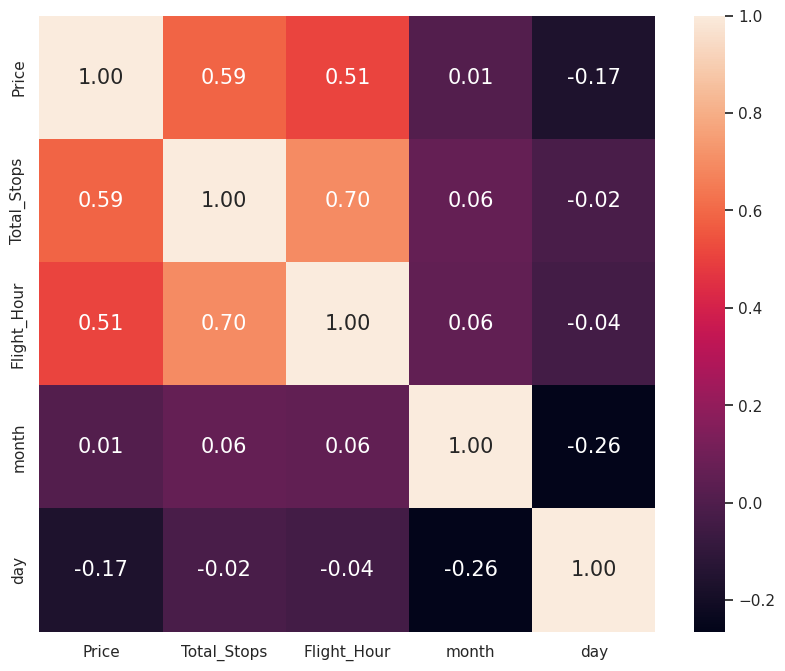

In [123]:
#Deleting columns which are not relevant for the analysis
df = df.drop('year', axis=1)
df = df.drop('Flight_Min', axis=1)

# Correlation chart

k = len(df.columns)
cols = df.corr().nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Month has a positive correlation to price while day has negative correlation to price

Flight Duration in hours have a positive correlation to price

Total Stops also has a positive correlation to Price, it seems more stops higher the price

In [124]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
onh=preprocessing.OrdinalEncoder()
df['Airline']=onh.fit_transform(df[['Airline']])
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,day,month,Flight_Hour
0,3.0,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,3897,24,3,2
1,1.0,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,7662,5,1,7
2,4.0,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,13882,6,9,19
3,3.0,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,6218,5,12,5
4,3.0,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,13302,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,Kolkata,Banglore,CCU → BLR,19:55,22:25,0,4107,4,9,2
10679,1.0,Kolkata,Banglore,CCU → BLR,20:45,23:20,0,4145,27,4,2
10680,4.0,Banglore,Delhi,BLR → DEL,08:20,11:20,0,7229,27,4,3
10681,10.0,Banglore,New Delhi,BLR → DEL,11:30,14:10,0,12648,3,1,2


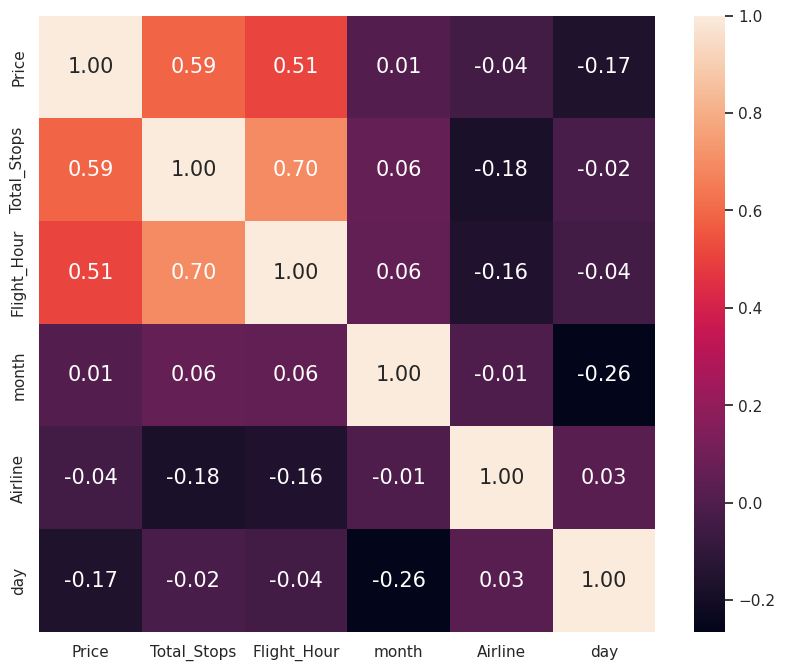

In [125]:
k = len(df.columns)
cols = df.corr().nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Ordinal encoding on airlines prooved effective in showing impact of Airlines on the price while any premium airline would have a higher price than non premium airline

In [2]:
#Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
#the dataset have?
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [127]:
df.shape

(10841, 13)

The data has 10000+ rows and 13 columns

In [ ]:
#Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
#app categories.



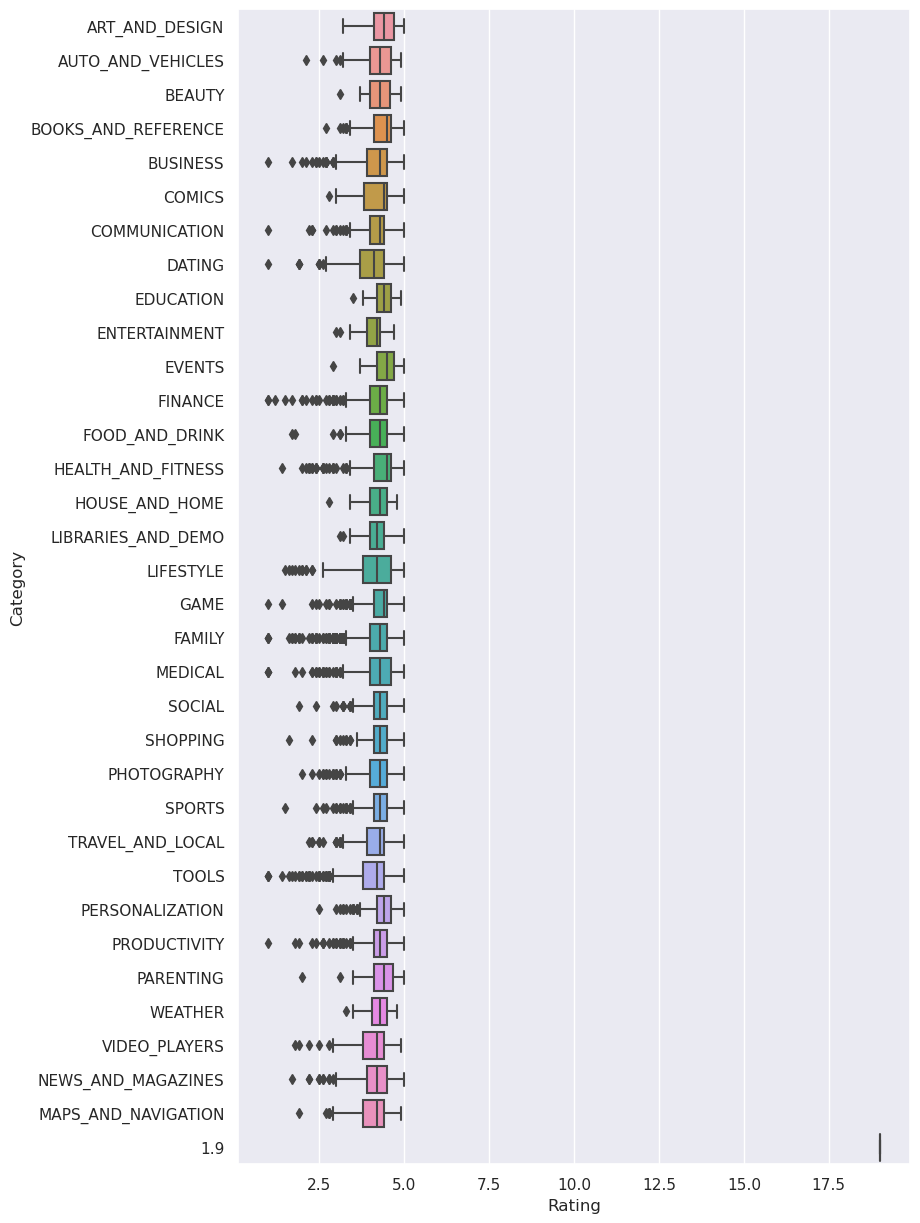

In [155]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.autoscale()
ax.set_aspect('equal', 'box')
#TComparing prices for different airlines on boxplots
bp= sns.boxplot(data=df,x='Rating', y='Category') 
plt.show()


In [8]:
#Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
#impact your analysis.
import pandas as pd
%matplotlib inline

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are many missing values in the the data, such missing values such as in Rating can cause lot of issues and errors in the final outcomes of an analysis

In [2]:
#Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
#the relationship.
df['Rating']=df['Rating'].fillna(method='ffill')
df.isnull().sum()
                                 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

We have tried to remove the Null values or missing values in rating with forward fill method

In [3]:
df['App'].nunique()

9660

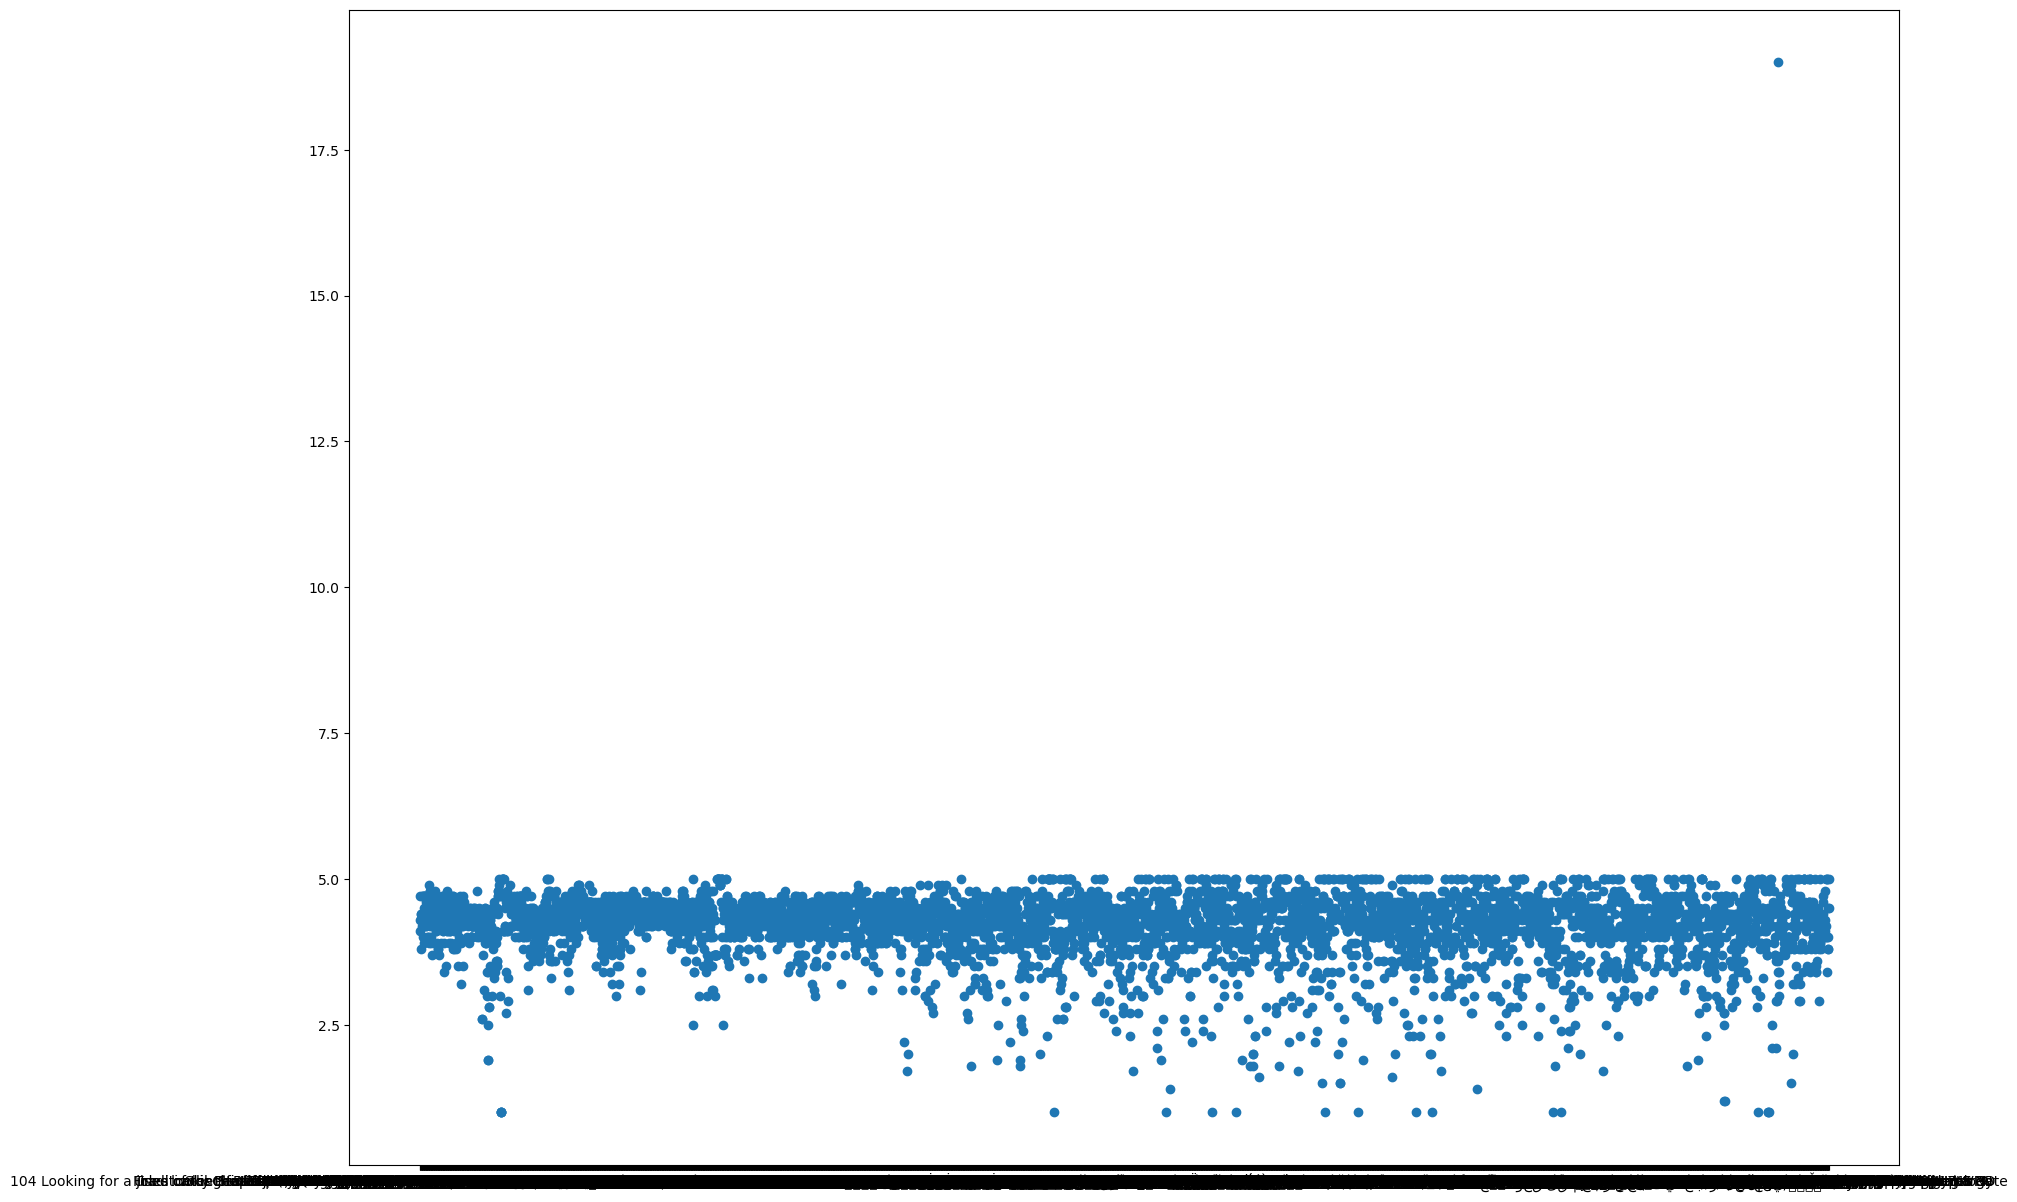

In [5]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
df_downsampled = df.iloc[::2]
fig, ax = plt.subplots(figsize=(20, 15))
plt.scatter(data=df_downsampled,x='App',y='Rating')
plt.show()

We have tried downsampling the non-numercial columns including App column to build a scatter plot

In [15]:
#Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.


In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [3]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df.columns = df.columns.str.strip()

In [4]:
df['Price_New']=df['Price'].str[1:]

df.head(-1500)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_New
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,Alipay,FINANCE,3.4,42497,61M,"1,000,000+",Free,0,Teen,Finance,"July 2, 2018",10.1.28.560,4.3 and up,
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56M,0+,Paid,$3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up,3.99
9338,EGW Writings,BOOKS_AND_REFERENCE,4.7,24278,3.1M,"1,000,000+",Free,0,Everyone,Books & Reference,"December 27, 2017",2.1.2,2.2 and up,
9339,Bible with EGW Comments,BOOKS_AND_REFERENCE,4.7,3776,12M,"100,000+",Free,0,Everyone,Books & Reference,"February 7, 2018",2.12.0,4.1 and up,


In [5]:
df['Price_New'] = df['Price_New'].replace('veryone',0)
df['Price_New'] = df['Price_New'].replace('',0)
df.head(-1500)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_New
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,Alipay,FINANCE,3.4,42497,61M,"1,000,000+",Free,0,Teen,Finance,"July 2, 2018",10.1.28.560,4.3 and up,0
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56M,0+,Paid,$3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up,3.99
9338,EGW Writings,BOOKS_AND_REFERENCE,4.7,24278,3.1M,"1,000,000+",Free,0,Everyone,Books & Reference,"December 27, 2017",2.1.2,2.2 and up,0
9339,Bible with EGW Comments,BOOKS_AND_REFERENCE,4.7,3776,12M,"100,000+",Free,0,Everyone,Books & Reference,"February 7, 2018",2.12.0,4.1 and up,0


In [8]:
df['Price_New'] = pd.to_numeric(df['Price_New'], errors='coerce')
df['Price_New'].info

<bound method Series.info of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price_New, Length: 10841, dtype: float64>

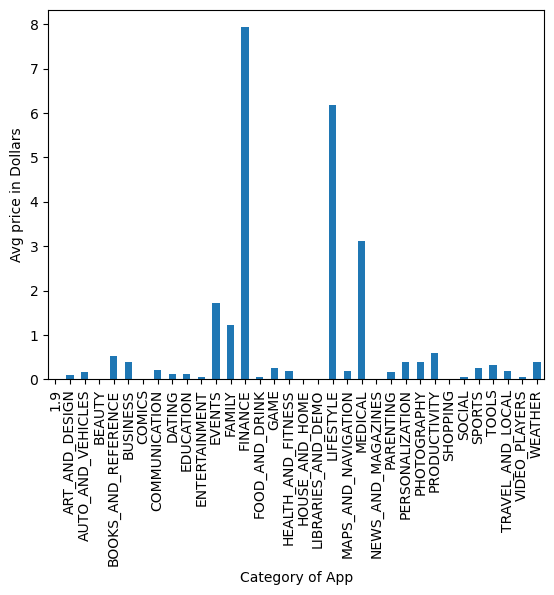

In [15]:
import matplotlib.pyplot as plt
grouped_df = df.groupby('Category')['Price_New'].mean()
grouped_df.plot(kind='bar')
plt.xlabel('Category of App')
plt.ylabel('Avg price in Dollars')
plt.show()

In [53]:
#Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
#with the highest number of installs.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
df.isnull().sum()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [54]:
df=df[df.Size !='Varies with device']

In [55]:
def convert_to_numeric(x):
    if 'M' in x:
        return float(x.replace('M', '')) * 1000000
    elif 'K' in x:
        return float(x.replace('K', '')) * 1000
    else:
        return 

df['Subs'] = df['Size'].apply(convert_to_numeric)

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800000.0


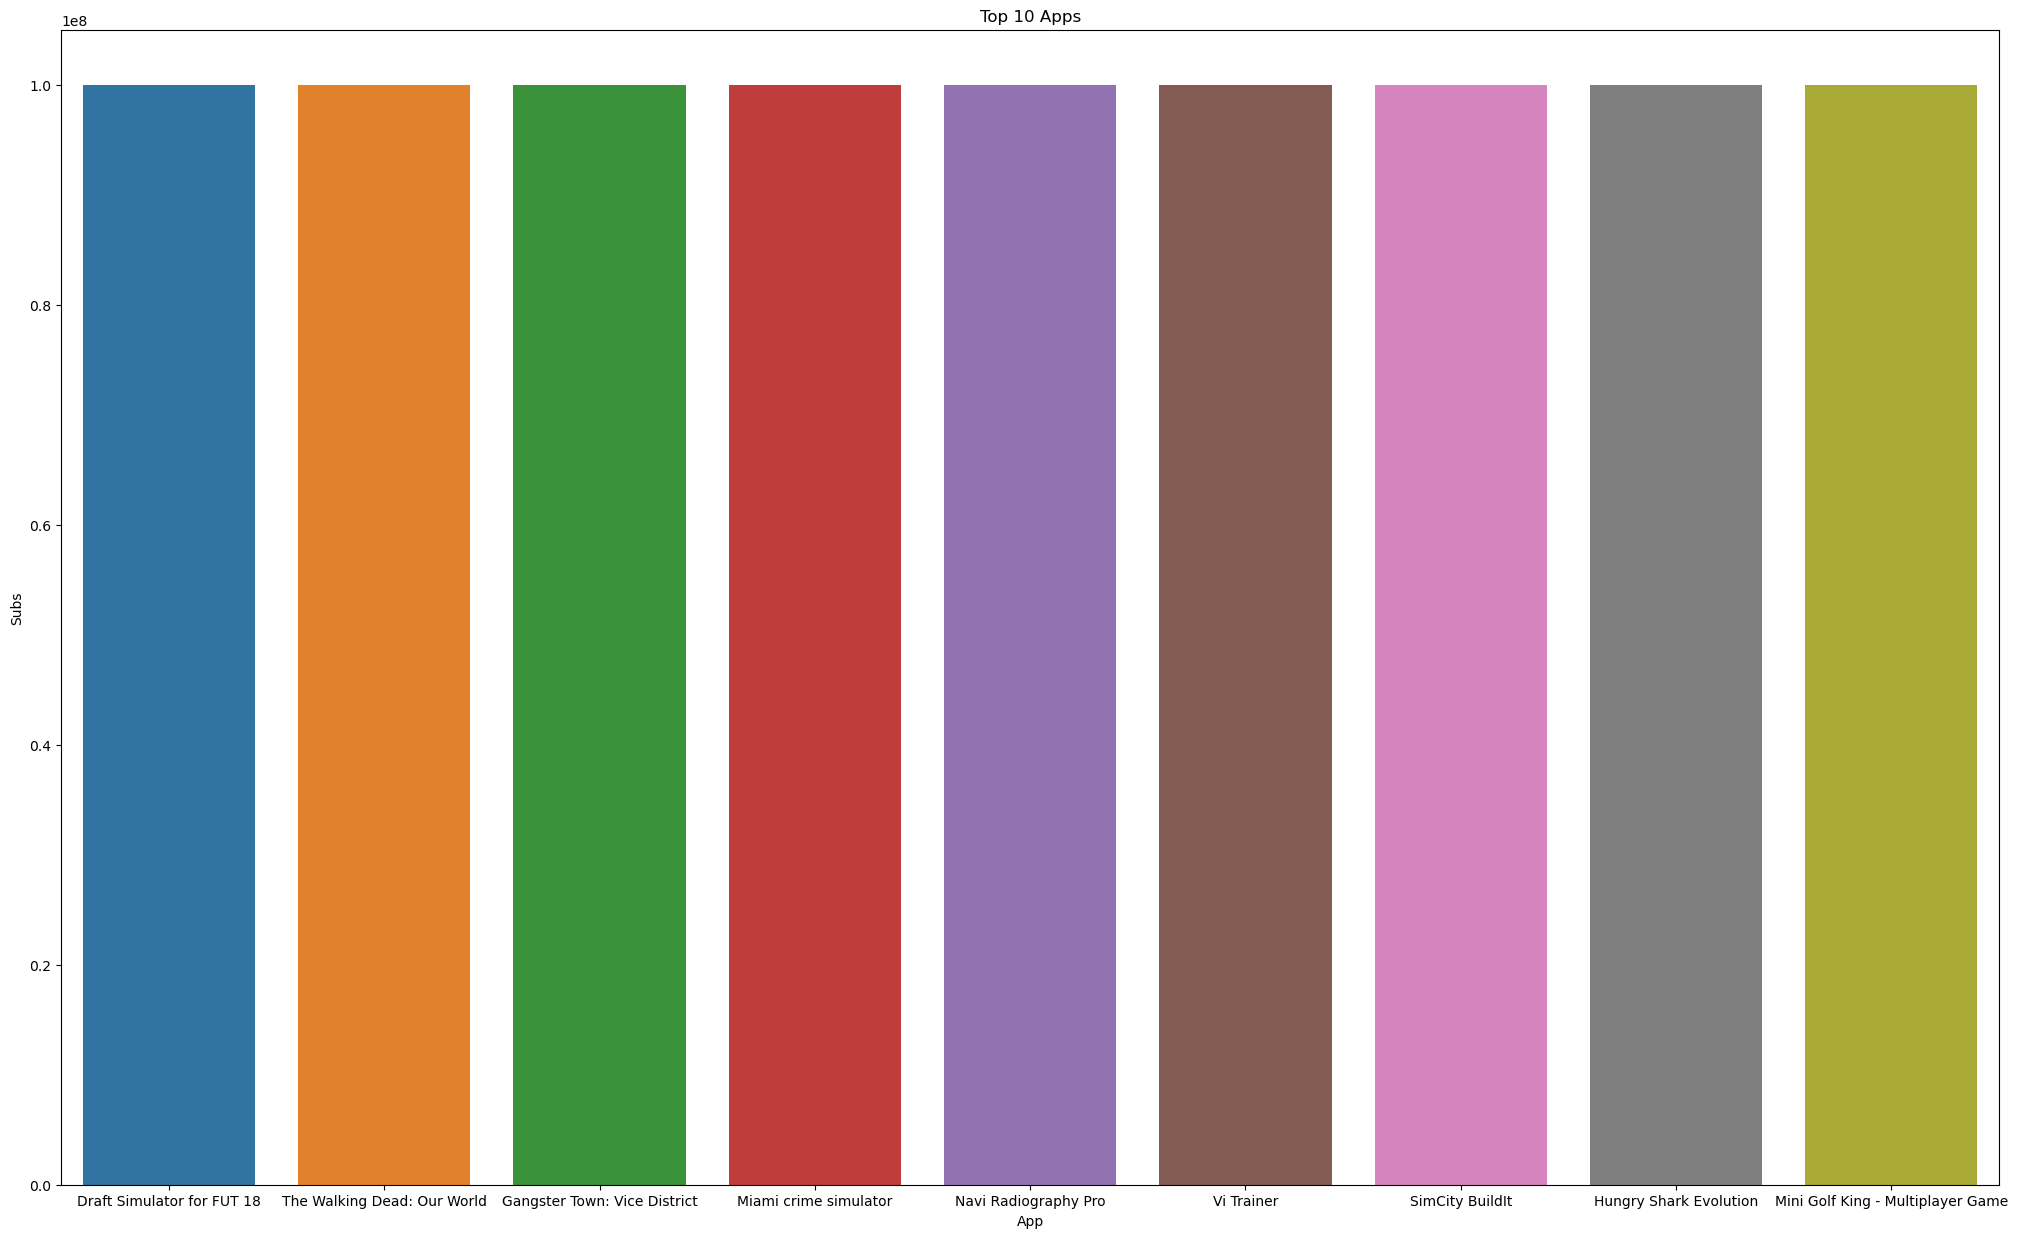

In [57]:
df = df.sort_values('Subs', ascending=False)
df=df.head(10)
plt.figure(figsize=[25,15])
ax = sns.barplot(data=df,x='App', y='Subs')
plt.title('Top 10 Apps')
plt.show()

In [2]:
#Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
#Google Playstore dataset to identify the most popular app categories. How would you approach this
#task, and what features would you analyze to make recommendations to the company?

import pandas as pd
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
filterwarnings('ignore')
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
df.isnull().sum()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
df=df.dropna()

In [5]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
df=df[df.Category !='1.9']

In [7]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Columns Category and Average Rating and Review gives a good combination on popularity fo the Apps across categories

In [11]:
grouped_df = df.groupby('Category')['Rating'].mean()
grouped_df.sort_values()

Category
DATING                 3.970769
TOOLS                  4.047203
MAPS_AND_NAVIGATION    4.051613
VIDEO_PLAYERS          4.063750
LIFESTYLE              4.094904
TRAVEL_AND_LOCAL       4.109292
BUSINESS               4.121452
ENTERTAINMENT          4.126174
FINANCE                4.131889
NEWS_AND_MAGAZINES     4.132189
COMICS                 4.155172
COMMUNICATION          4.158537
FOOD_AND_DRINK         4.166972
LIBRARIES_AND_DEMO     4.179688
MEDICAL                4.189143
AUTO_AND_VEHICLES      4.190411
PHOTOGRAPHY            4.192114
FAMILY                 4.192383
HOUSE_AND_HOME         4.197368
PRODUCTIVITY           4.211396
SPORTS                 4.223511
WEATHER                4.244000
SOCIAL                 4.255598
SHOPPING               4.259664
HEALTH_AND_FITNESS     4.277104
BEAUTY                 4.278571
GAME                   4.286326
PARENTING              4.300000
PERSONALIZATION        4.335256
BOOKS_AND_REFERENCE    4.346067
ART_AND_DESIGN         4.377049

A bar plot will help me plot the average rating across the categories and give me a clear indication on the category from the above, it seems that ART_AND_DESIGN , Education and Events are the most popular categories



I am unable to save the plot here because of 413 Size Issues have saved the image in a separate file

In [ ]:
plt.figure(figsize=[25,15])
sns.barplot(x=grouped_df.index, y=grouped_df.values)
plt.xticks(rotation=90)
plt.savefig('plot.png', bbox_inches='tight')


In [9]:
#Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
#most successful app developers. What features would you analyze to make recommendations to the
#company, and what data visualizations would you use to present your findings?

import pandas as pd
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
filterwarnings('ignore')
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


1- The features I would use are App, Category, Ratings, Reviews and Installs to gauge the most successful app developers

2- Visualizations could be to map App against number of installs in a lineplot or bar plot

3- Another one could be App vs Rating to show feedback of customers

4- Another one could be App vs Installs vs Ratings in a histogram plot with hue being ratings

In [ ]:
#Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
#launch a new app. What features would you analyze to make recommendations to the company, and
#what data visualizations would you use to present your findings?

I was having trouble saving the notebook with the 413 issue. Hence I am writing down the answer and method direclty instead of coding it.

1- I would extract the Day and month from the Last Updated column
2- I would then plot the number of Installs vs Month data features to identify the best possible month to launch an application



In [ ]:
df=df[df['Last Updated']!='1.0.19']
df['date'] = pd.to_datetime(df['Last Updated'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['Installs']=df['Installs'].str[:-1]
#Converting this column into numeric
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
#Ploting the Month vs no of installs

grouped_df = df.groupby('month')['Installs'].mean()
grouped_df.sort_values()
plt.figure(figsize=[25,15])
sns.barplot(x=grouped_df.index, y=grouped_df.values)
plt.xticks(rotation=90)
plt.savefig('plot1.png', bbox_inches='tight')
